# Project 14: Singular Value Decomposition and image compression

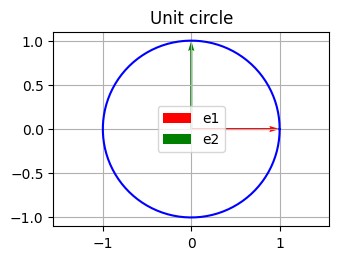

In [1]:
 #Q1. Plot the unit circle with standard basis vectors in a 2D subplot using matplotlib.
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Plotting the unit circle and basis vectors
t = np.linspace(0, 2 * np.pi, 100)
X = np.array([np.cos(t), np.sin(t)])

plt.subplot(2, 2, 1)  # 2x2 grid, position 1
plt.plot(X[0, :], X[1, :], 'b')  # Blue circle
plt.quiver(0, 0, 1, 0, color='r', angles='xy', scale_units='xy', scale=1, label='e1')  # Vector e1 = (1,0)
plt.quiver(0, 0, 0, 1, color='g', angles='xy', scale_units='xy', scale=1, label='e2')  # Vector e2 = (0,1)
plt.axis('equal')
plt.title('Unit circle')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
#Q2. Compute the SVD of matrix A, print U, S, V, and verify that U and V are orthogonal.
# Define matrix A
A = np.array([[2, 1], [-1, 1]])

# Compute SVD
U, S, Vt = np.linalg.svd(A)

# Display results
print("U:\n", U)
print("Singular values (S):\n", S)
print("V (transposed):\n", Vt)

# Verify orthogonality: U.T @ U and V @ V.T should be identity
print("U.T @ U:\n", np.dot(U.T, U))
print("V.T @ V:\n", np.dot(Vt.T, Vt))

U:
 [[-0.95709203  0.28978415]
 [ 0.28978415  0.95709203]]
Singular values (S):
 [2.30277564 1.30277564]
V (transposed):
 [[-0.95709203 -0.28978415]
 [-0.28978415  0.95709203]]
U.T @ U:
 [[1.00000000e+00 1.77671996e-17]
 [1.77671996e-17 1.00000000e+00]]
V.T @ V:
 [[ 1.00000000e+00 -2.42191841e-17]
 [-2.42191841e-17  1.00000000e+00]]


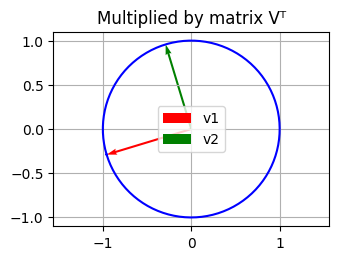

In [3]:
#Q3. Apply the transpose of matrix V (from SVD) to the unit circle and basis vectors to visualize rotation/reflection.
# Apply V^T to the circle points
VX = np.dot(Vt, X)

# Plot transformed unit circle and new basis vectors
plt.subplot(2, 2, 2)
plt.plot(VX[0, :], VX[1, :], 'b')  # Transformed circle

# Plot columns of V (from V = Vt.T)
V = Vt.T
plt.quiver(0, 0, V[0, 0], V[1, 0], color='r', angles='xy', scale_units='xy', scale=1, label='v1')
plt.quiver(0, 0, V[0, 1], V[1, 1], color='g', angles='xy', scale_units='xy', scale=1, label='v2')

plt.axis('equal')
plt.title('Multiplied by matrix Vᵀ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

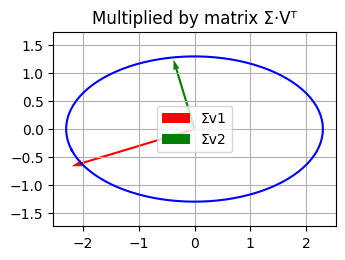

In [4]:
#Q4. Multiply the result from Vᵀ * X by Σ (diagonal matrix of singular values) to show how the unit circle is stretched into an ellipse
# Step 2: Multiply by Σ (S matrix)
S_matrix = np.diag(S)
SVX = np.dot(S_matrix, VX)

# Plot the stretched ellipse
plt.subplot(2, 2, 3)
plt.plot(SVX[0, :], SVX[1, :], 'b')  # Ellipse

# Plot stretched basis vectors
V = Vt.T
plt.quiver(0, 0, S[0] * V[0, 0], S[0] * V[1, 0], color='r', angles='xy', scale_units='xy', scale=1, label='Σv1')
plt.quiver(0, 0, S[1] * V[0, 1], S[1] * V[1, 1], color='g', angles='xy', scale_units='xy', scale=1, label='Σv2')

plt.axis('equal')
plt.title('Multiplied by matrix Σ·Vᵀ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

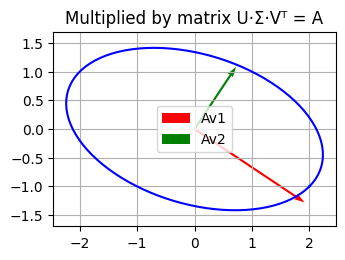

In [5]:
#Q5. Multiply by matrix U to complete the SVD transformation: visualize A·X = U·Σ·Vᵀ·X as a final rotation/reflection of the ellipse.
# Step 3: Multiply by U -> A·X
AX = np.dot(U, SVX)

# Plot final result
plt.subplot(2, 2, 4)
plt.plot(AX[0, :], AX[1, :], 'b')  # Final transformed ellipse

# Basis vector 1 (red)
v1_trans = S[0] * V[:, 0]  # Σ * v1
u1 = U[:, 0]               # u1
vec1 = U @ v1_trans        # Equivalent to: U[:, 0]*S[0]*V[0,0] + U[:, 1]*S[1]*V[0,1]
plt.quiver(0, 0, vec1[0], vec1[1], color='r', angles='xy', scale_units='xy', scale=1, label='Av1')

# Basis vector 2 (green)
v2_trans = S[1] * V[:, 1]  # Σ * v2
vec2 = U @ v2_trans
plt.quiver(0, 0, vec2[0], vec2[1], color='g', angles='xy', scale_units='xy', scale=1, label='Av2')

plt.axis('equal')
plt.title('Multiplied by matrix U·Σ·Vᵀ = A')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
#Q6. Modify matrices U and V to eliminate reflections and verify that the new SVD (U₁·Σ·V₁ᵀ) still gives matrix A — showing SVD is not unique.
U1 = U 
V1 = V.T 
print("U1 * S * V1.T:\n", np.dot(U1, np.dot(S_matrix, V1.T)))

U1 * S * V1.T:
 [[ 2.  1.]
 [-1.  1.]]


In [7]:
#Q7. Check the fact Av1 = σ1u1 and Av2 = σ2v2, numerically by computing the expression A*V-U*S. 
Av1 = np.dot(A, V.T[:, 0]) 
Av2 = np.dot(A, V.T[:, 1]) 
print("Av1:\n", Av1) 
print("σ1 * u1:\n", S[0] * U[:, 0]) 
print("Av2:\n", Av2) 
print("σ2 * u2:\n", S[1] * U[:, 1]) 
# Numerical check 
print("A * V - U * S:\n", np.dot(A, V.T) - np.dot(U, S_matrix))

Av1:
 [-2.2039682   0.66730788]
σ1 * u1:
 [-2.2039682   0.66730788]
Av2:
 [0.37752373 1.24687618]
σ2 * u2:
 [0.37752373 1.24687618]
A * V - U * S:
 [[-8.88178420e-16  2.77555756e-16]
 [ 3.33066907e-16  2.22044605e-16]]


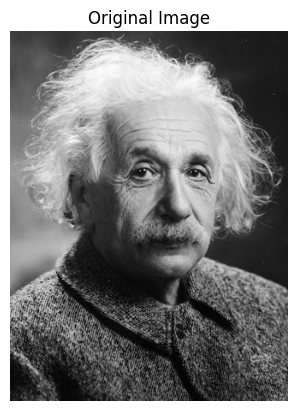

In [8]:
#Q8.Image compression using SVD.
# Load the image using Matplotlib
ImJPG = plt.imread('einstein.jpg')  # Works for JPG and PNG
plt.imshow(ImJPG, cmap='gray' if len(ImJPG.shape) == 2 else None)
plt.axis('off')
plt.title('Original Image')
plt.show()

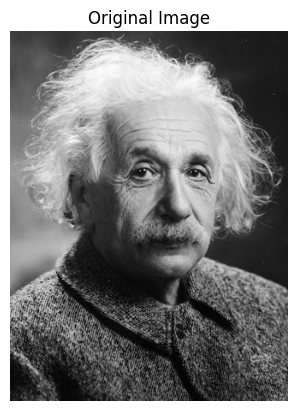

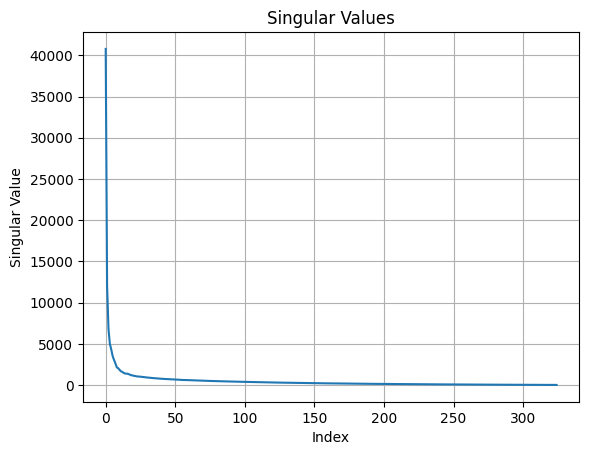

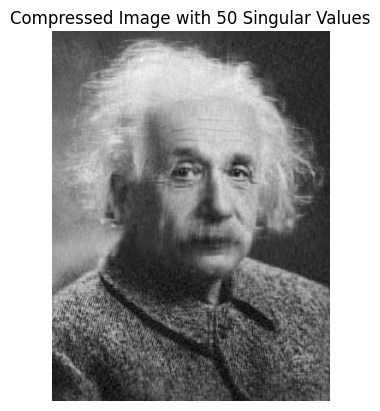

Compression percentage for 50 singular values: 73.033%


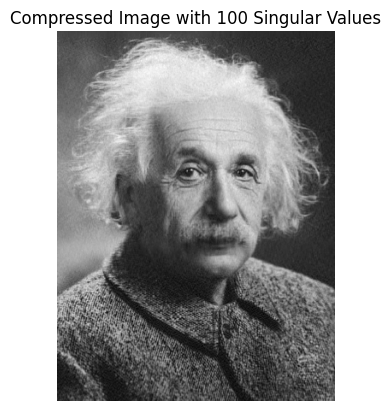

Compression percentage for 100 singular values: 46.065%


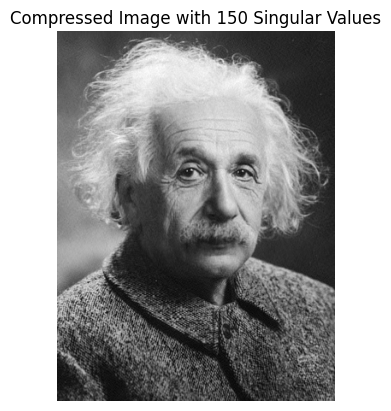

Compression percentage for 150 singular values: 19.098%


In [9]:
#Q9. Perform SVD on a grayscale image matrix, plot the singular values, and display compressed reconstructions using k = 50, 100, 150 singular values. Also, compute and print compression percentage.
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the grayscale image
ImJPG = cv2.imread("einstein.jpg", cv2.IMREAD_GRAYSCALE)

# Show the original image
plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Singular Value Decomposition
UIm, SIm, VIm = np.linalg.svd(ImJPG.astype(np.float64), full_matrices=False)

# Plot singular values
plt.figure()
plt.plot(np.arange(len(SIm)), SIm)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# Compress image using k singular values
for k in [50, 100, 150]:
    ImJPG_comp = np.dot(UIm[:, :k], np.dot(np.diag(SIm[:k]), VIm[:k, :]))
    
    plt.figure()
    plt.imshow(ImJPG_comp, cmap='gray')
    plt.title(f'Compressed Image with {k} Singular Values')
    plt.axis('off')
    plt.show()
    
    # Compression percentage (approximate storage saving)
    orig_size = ImJPG.size
    compressed_size = UIm[:, :k].size + VIm[:k, :].size + SIm[:k].size
    pct = 1 - (compressed_size / orig_size)
    
    print(f'Compression percentage for {k} singular values: {pct:.3%}')

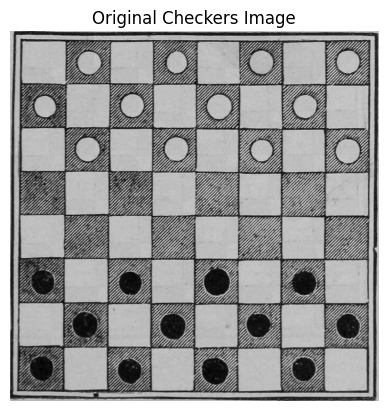

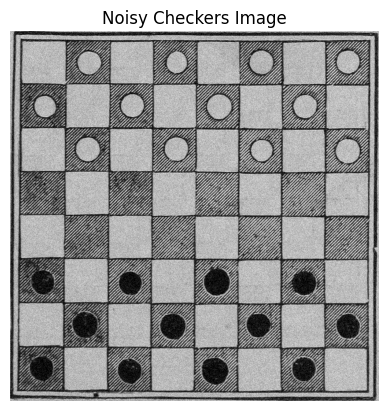

In [10]:
#Q10. Demonstrate noise smoothing using SVD. Add noise to a grayscale checkerboard image and compare the original vs. noisy images.
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the grayscale checkerboard image
ImJPG = cv2.imread("checkers.pgm", cv2.IMREAD_GRAYSCALE)

# Add synthetic noise to the image
m, n = ImJPG.shape
ImJPG_Noisy = ImJPG.astype(np.float64) + 50 * (np.random.rand(m, n) - 0.5)

# Clip values to keep pixel intensities valid (0–255)
ImJPG_Noisy = np.clip(ImJPG_Noisy, 0, 255)

# Display original image
plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Checkers Image')
plt.axis('off')
plt.show()

# Display noisy image
plt.figure()
plt.imshow(ImJPG_Noisy, cmap='gray')
plt.title('Noisy Checkers Image')
plt.axis('off')
plt.show()

In [11]:
#Q11. . Compute the SVD of the matrix ImJPG Noisy and save the resulting decomposition matrices as UIm, SIm, and VIm.
# Compute SVD of the noisy image 
UIm, SIm, VIm = np.linalg.svd(ImJPG_Noisy, full_matrices=False) 

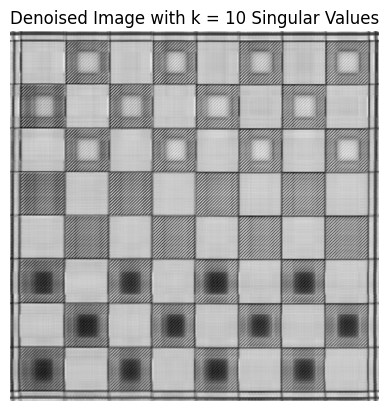

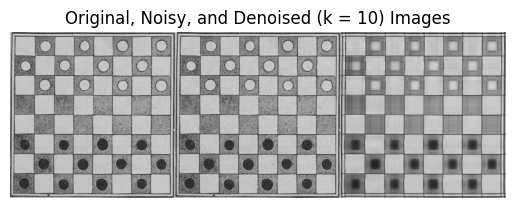

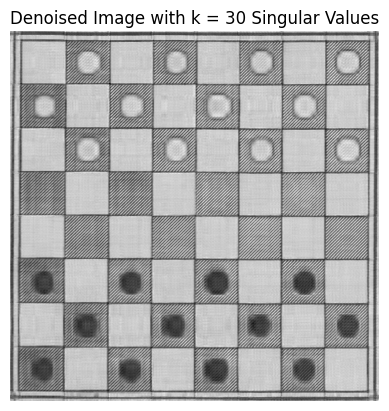

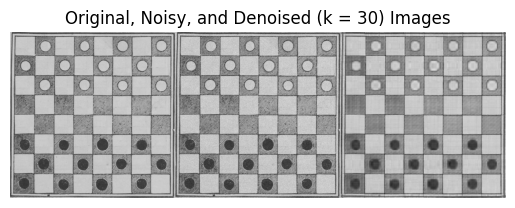

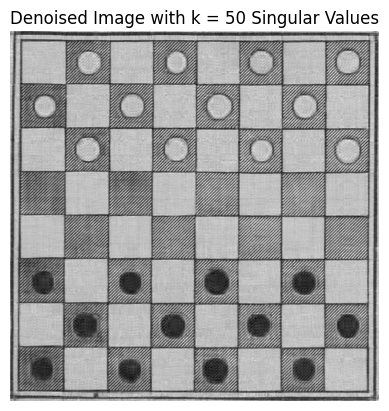

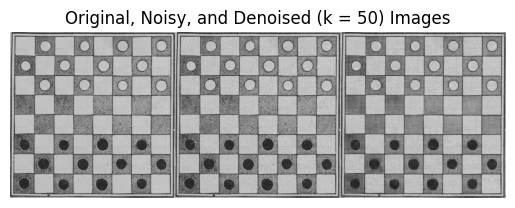

In [12]:
#Q12. Using the noisy checkerboard image from Q12, compute SVD-based approximations with k = 10, 30, and 50 singular values.
# Function to approximate the image with k singular values 
def approximate_image(U, S, V, k): 
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :])) 
 
# Approximations with k = 10, k = 30, k = 50 singular values 
ks = [10, 30, 50] 
for k in ks: 
    ImJPG_approx = approximate_image(UIm, SIm, VIm, k) 
    plt.figure() 
    plt.imshow(ImJPG_approx, cmap='gray') 
    plt.title(f'Denoised Image with k = {k} Singular Values') 
    plt.axis('off') 
    plt.show() 
 
    # Compare the images to the initial noisy image 
    plt.figure() 
    plt.imshow(np.hstack((ImJPG, ImJPG_Noisy, ImJPG_approx)), cmap='gray') 
    plt.title(f'Original, Noisy, and Denoised (k = {k}) Images') 
    plt.axis('off') 
    plt.show() 